# Numerical features:

+ amount_tsh: the amount of water: it contains 0s as invaild values. nonlinear transformation does not help to remove the 0 values
+ gps_height: the values look ok no invaild values (it not possible to tell if the 0s are invaild values)
+ longitude: there are some 0 values as invalid values and they should be replaced
+ latitude: No sign of invalid values
+ population: there are some zeros as invalid values

# Categorical features:

+ region_code: there are some outliers with log transformation the problem can be solved
+ district_code: there are some outliers but the log transform it can solved
+ funder: 3635 missing values, a lot of categories
+ installer: 3655 missing values, a lot of categories
+ wpt_name: a lot of categories there are some None values
+ payment: limited categories no sign for missing values
+ payment_type: limited categories no sign for missing values (there are some 0s)
+ water_quality:limited categories no sign for missing values (there are some 0s)
+ quality_group:limited categories no sign for missing values (there are some 0s)
+ source:limited categories no sign for missing values (there are some 0s)
+ source_type:limited categories no sign for missing values (there are some 0s) (high correlated with soruce)
+ source_class: alot of 0s-->unknown
+ waterpoint_type:limited categories no sign for missing values (there are some 0s)
+ waterpoint_type_group:limited categories no sign for missing values (there are some 0s)
+ basin:limited categories no sign for missing values
+ subvillage: 371 missing values, a lot of categories there are no sign of missing values
+ region: limited categories no sign for missing values
+ lga:a lot of categories there are no sign of missing values
+ ward:a lot of categories there are no sign of missing values
+ public_meeting: 3334 missing values:limited categories there are some signs for missing values (there are some 0s and -1)
+ recorded_by: one value no variation
+ scheme_management: 3877 missing values limited categories
+ scheme_name: 28166 missing values lot of categories
+ permit:3056 missing value two categories
+ extraction_type:limited categories no sign for missing values
+ extraction_type_group:limited categories no sign for missing values
+ extraction_type_class:limited categories no sign for missing values
+ management:limited categories no sign for missing values
+ management_group:limited categories no sign for missing values
+ quantity:limited categories no sign for missing values
+ quantity_group:limited categories no sign for missing values

# Labels:
There are three labels status_group that should be predicted:

+ functional
+ non functional
+ functional needs repair.

## Importing relevant libraries and packages

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

The data that is goingto be used in this project is from 2 datasets. One with all the feature information and another that contains the target or the value to be predicted

In [110]:
#imports the Tanzania water training data set

filepath = "data/tanzania_water_training.csv"
details_df = pd.read_csv(filepath)
pd.set_option('display.max_columns', None)
details_df.tail(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59390,13677,0.0,2011-08-04,Rudep,1715,DWE,31.370848,-8.258160,Kwa Mzee Atanas,0,Lake Tanganyika,Kitonto,Rukwa,15,2,Sumbawanga Rural,Mkowe,150,True,GeoData Consultants Ltd,VWC,NaN,False,1991,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump
59391,44885,0.0,2013-08-03,Government Of Tanzania,540,Government,38.044070,-4.272218,Kwa,0,Pangani,Maore Kati,Kilimanjaro,3,3,Same,Maore,210,True,GeoData Consultants Ltd,Water authority,Hingilili,True,1967,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,Lake Rukwa,Mbuyuni A,Mbeya,12,1,Chunya,Mbuyuni,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,Internal,Masanga,Tabora,14,2,Igunga,Igunga,0,False,GeoData Consultants Ltd,Water authority,NaN,False,0,gravity,gravity,gravity,private operator,commercial,pay per bucket,per bucket,soft,good,insufficient,insufficient,dam,dam,surface,other,other
59394,11164,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,Wami / Ruvu,Komstari,Morogoro,5,6,Mvomero,Diongoya,89,True,GeoData Consultants Ltd,VWC,NaN,True,2007,submersible,submersible,submersible,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,Wami / Ruvu,Kikatanyemba,Morogoro,5,2,Morogoro Rural,Ngerengere,150,True,GeoData Consultants Ltd,VWC,NaN,True,2002,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [111]:
details_df.shape

(59400, 40)

The data set contains 59400 records and 40 columns. That is alot and some of the columns will not make it to our analysis and modelling

Below arethe 40 column names and the datatypes of the column data

In [112]:
details_df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [113]:
#importing the target data set

conditions_df = pd.read_csv("data/training_set_labels.csv")
conditions_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [114]:
conditions_df.shape

(59400, 2)

In [115]:
#merging the 2 data sets to form 1 big one

all_df = details_df.merge(conditions_df[["id", "status_group"]], on="id")
all_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


The combined data set has 59400 rows and 41 columns as seen in the cell below. The data types of the respective columns are also seen below

In [116]:
all_df.shape

(59400, 41)

In [117]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

### Data Cleaning and wrangling

Dealing with missing or NaN values

In [118]:
#outputs columns and thier missing value numbers in descending order
all_df.isna().sum().sort_values(ascending=False)

scheme_name              28810
scheme_management         3878
installer                 3655
funder                    3637
public_meeting            3334
permit                    3056
subvillage                 371
wpt_name                     2
water_quality                0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
quantity                     0
quality_group                0
extraction_type              0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
extraction_type_group        0
id                           0
construction_year            0
amount_tsh                   0
recorded_by                  0
population                   0
ward                         0
lga                          0
district_code                0
region_c

In [119]:
missing_data = all_df.isnull().sum()
missing_data = missing_data.drop(missing_data[missing_data == 0].index).sort_values(ascending=False)
missing_df = pd.DataFrame({'missing number' :missing_data})
missing_df['missing percent'] = (missing_df['missing number'] / len(all_df)) * 100
missing_df


,missing number,missing percent
scheme_name,28810,48.501684
scheme_management,3878,6.528620
installer,3655,6.153199
funder,3637,6.122896
public_meeting,3334,5.612795
permit,3056,5.144781
subvillage,371,0.624579
wpt_name,2,0.003367


Text(0.5, 1.0, 'Graph of missing records in the dataset')

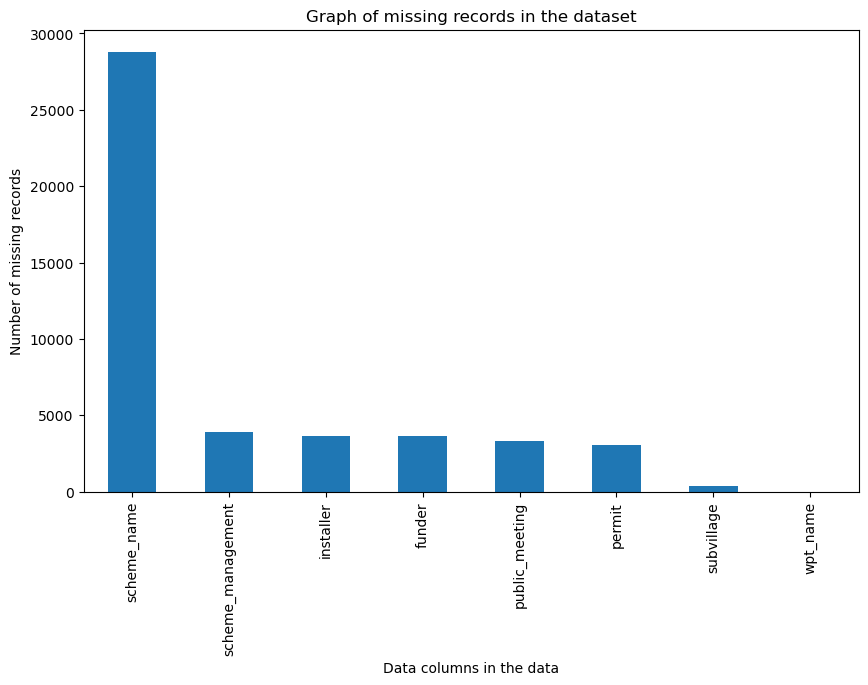

In [120]:
missing_data.plot(kind='bar', figsize=(10,6))
plt.ylabel("Number of missing records")
plt.xlabel("Data columns in the data")
plt.title("Graph of missing records in the dataset")

From the cells above we can see that the columns with the most missing values. They are represented with a bar chart showing the number of records missing in he columns. From the cells above we can see that the column `scheme_name` has the most at 28810 records an the rest being around 3000 missing records and finally the las which is `wpt_name` being at around 300. From this we can see that most of these columns store object or string data types

With 48.5% of the `scheme_name` data missing dropping this data column is the right decision. We could try replacing the missing values with a place holder word like "other" but considering that it stores names of the water pumping projects, there are very few reoccuring values in the data column hence this option is not feasible.



For the binary data columns `public_meeting` and `permit` they are going to be replaced by the most likely outcome

In [121]:
#dropping column scheme_name
all_df.drop(['scheme_name'], axis=1, inplace=True)
all_df.shape

(59400, 40)

For the other data features `scheme_management`, `installer`, `funder`, `subvillage`, `wpt_name` it is feasible to replace them with other

In [131]:
#replacing null values in these columns with "other"
missed = ["installer", "funder", "subvillage", "wpt_name", "scheme_management"]
for m in missed:
    all_df[m].fillna("other",inplace=True)

For the binary data columns `public_meeting` and `permit` they are going to be replaced according to a criteria.


In [125]:
#most likely outcome is True
all_df['public_meeting'].value_counts(dropna=False)

#filling null values with True
all_df['public_meeting'].fillna(True, inplace=True)

In the case of `public_meeting` above, the null values were replaced by True. This is mainly because we can say that a verbal meeting could have taken place and there might not have been a physical record. Hence we are going to use a bias that the meeting most likely happened.

For `permit` however, we are going to act with a bias of permit is a legal document and in this case a permit is more likely not to exist that it does exist. This is because a permit is issued by a governing institution and the government records do exist.

In [128]:
all_df['permit'].value_counts(dropna=False)

all_df['permit'].fillna(False, inplace=True)

In [132]:
#rechecking all the null values

all_df.isna().sum().sort_values(ascending=False)

id                       0
amount_tsh               0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
permit                   0
scheme_management        0
recorded_by              0
num_private              0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
basin                    0
public_meeting           0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
w

As you can see from above there are no more null 

### Dealing with 0s in numerical values

Replacing 0s in the `population` data column with the mean of the whole column

In [136]:
#replacing 0s in the population value with mean
all_df['population'].replace(0, all_df['population'].mean(axis=0),inplace=True)
count_pop = (all_df['population'] == 0).sum()

Replacing 0s in the `construction_year` data column with the mean of the whole column

In [140]:
#replacing 0s in the population with the mean
all_df['construction_year'].replace(0, all_df['construction_year'].mean(axis=0),inplace=True)
const_year = (all_df['construction_year'] == 0).sum()
const_year

0

In [93]:
all_df['date_recorded'] = pd.to_datetime(all_df['date_recorded'])
all_df['date_recorded'].dt.year.head()

0    2011
1    2013
2    2013
3    2013
4    2011
Name: date_recorded, dtype: int32

In [94]:
all_df.loc[all_df['construction_year'] == 0].shape

(20709, 40)

In [95]:
all_df['operational_years'] = all_df['date_recorded'].dt.year - all_df['construction_year']
all_df['operational_years'].head(6)

0      12
1       3
2       4
3      27
4    2011
5       2
Name: operational_years, dtype: int64

In [96]:
all_df['operation_region'] = all_df.amount_tsh * all_df.region_code
all_df['operation_population'] = all_df.amount_tsh * all_df.population
all_df['operation_year'] = all_df.amount_tsh * all_df.construction_year

In [97]:
all_df.shape

(59400, 44)

In [98]:
all_df.drop(['id','recorded_by','date_recorded'], axis = 1, inplace = True)

water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64

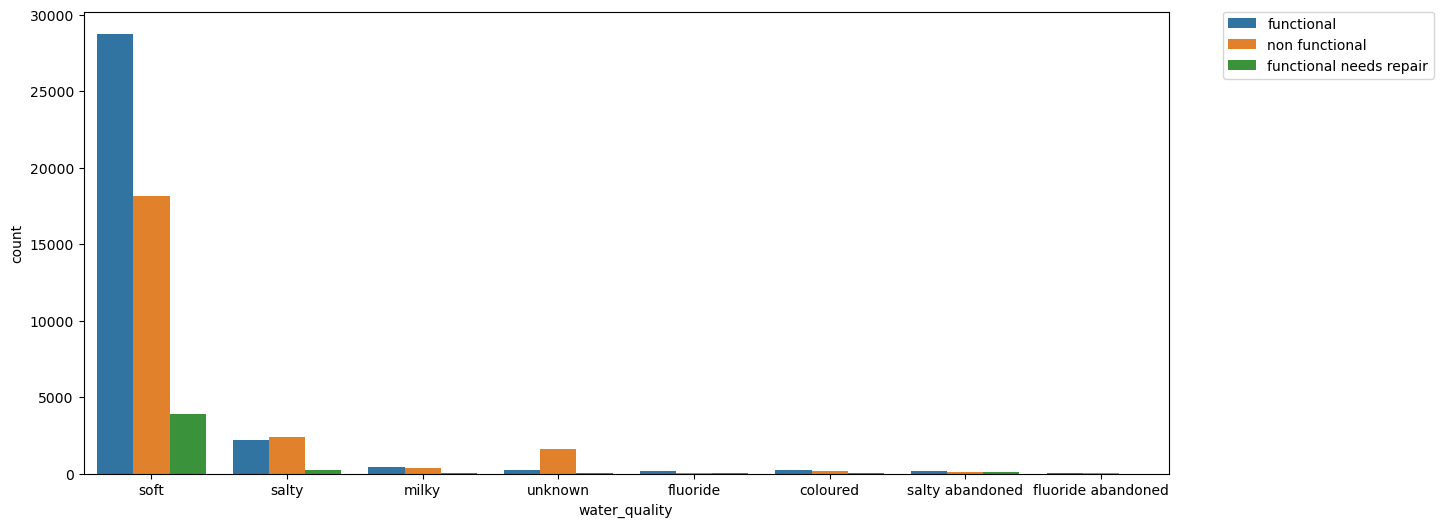

In [99]:
plt.figure(figsize=(14,6))
sns.countplot(data=all_df, x='water_quality', hue='status_group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
all_df.water_quality.value_counts()

In [100]:
all_df.loc[all_df['amount_tsh'] == 0].shape

(41639, 41)

<Axes: xlabel='region', ylabel='count'>

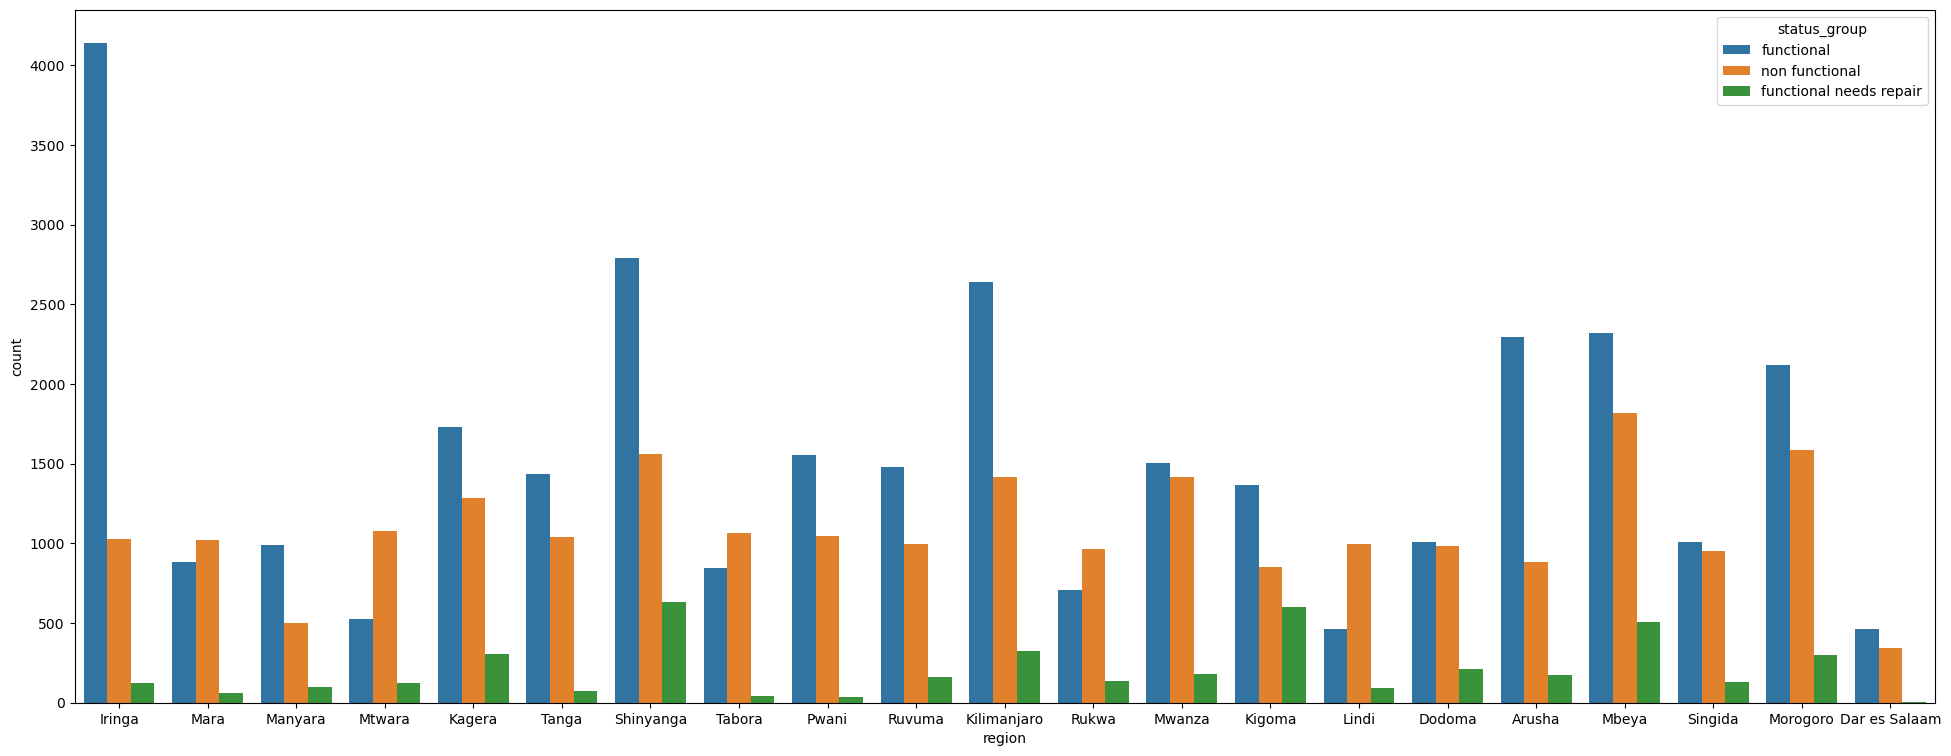

In [101]:
plt.figure(figsize=(24, 9))
sns.countplot(data=all_df,x='region',hue='status_group')

<Axes: xlabel='public_meeting', ylabel='count'>

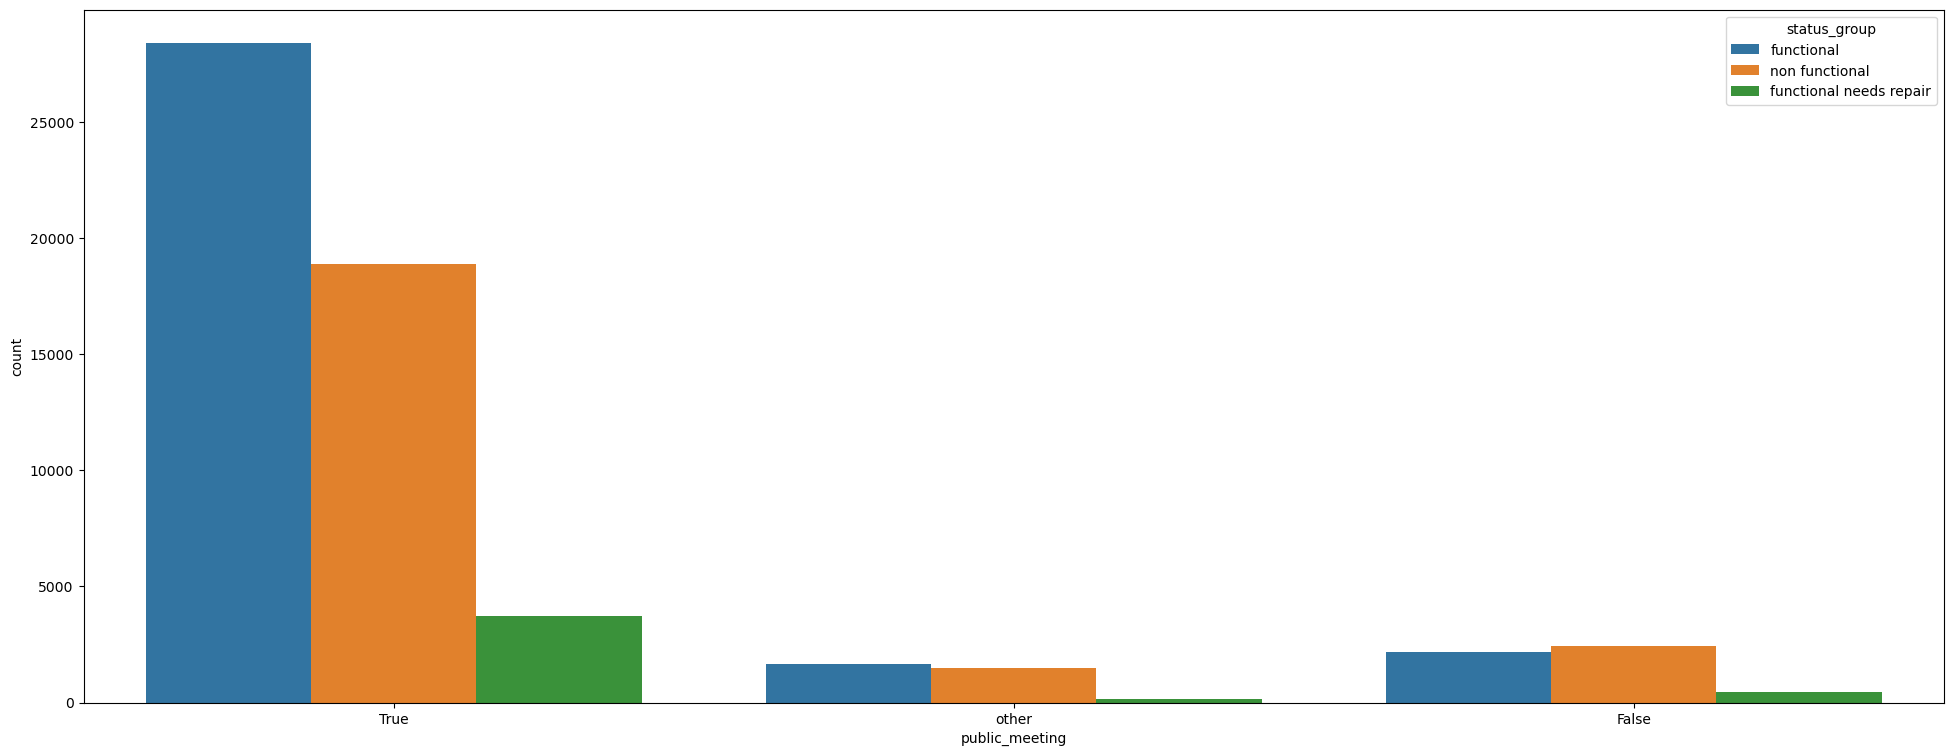

In [102]:
plt.figure(figsize=(24, 9))
sns.countplot(data=all_df,x='public_meeting',hue='status_group')

<Figure size 2400x900 with 0 Axes>

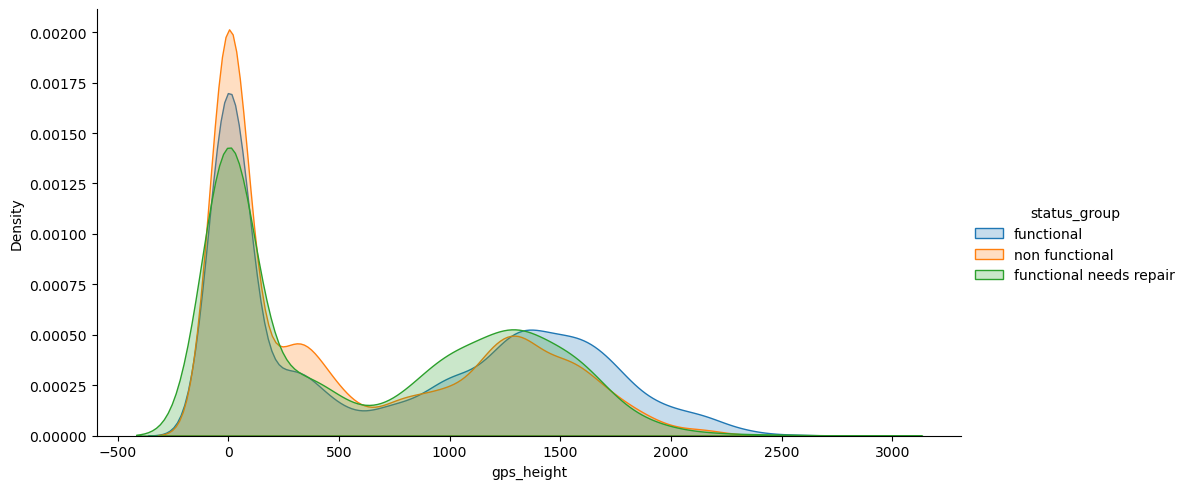

In [103]:
plt.figure(figsize=(24, 9))
sns.FacetGrid(data=all_df, hue='status_group', height=5, aspect=2).map(sns.kdeplot, 'gps_height', shade=True).add_legend()

In [104]:
# create a list of our conditions
conditions = [
    (all_df['status_group'] == "functional"),
    (all_df['status_group'] == "non functional"),
    (all_df['status_group'] == "functional needs repair")]
# create a list of the values we want to assign for each condition
values = [1, 0, 2]

# create a new column and use np.select to assign values to it using our lists as arguments
all_df['Operation'] = np.select(conditions, values)

In [105]:
all_df.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,...,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,operational_years,operation_region,operation_population,operation_year,Operation
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,...,spring,groundwater,communal standpipe,communal standpipe,functional,12,66000.0,654000.0,11994000.0,1
1,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,...,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,3,0.0,0.0,0.0,1
2,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,...,dam,surface,communal standpipe multiple,communal standpipe,functional,4,525.0,6250.0,50225.0,1
3,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,...,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,27,0.0,0.0,0.0,0
4,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,...,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,0.0,0.0,0.0,1
